Priority flood flow router

# 1 Making random topographic grid

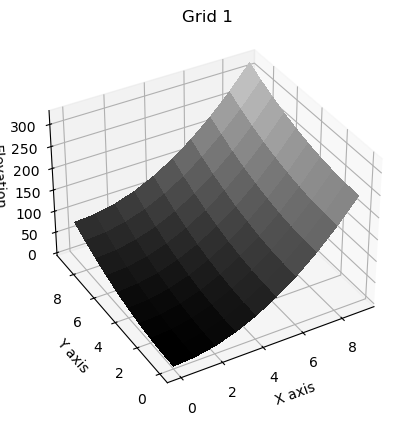

In [66]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

from landlab import RasterModelGrid
from landlab.components import PriorityFloodFlowRouter
from landlab.plot.drainage_plot import drainage_plot


# create a plotting routine to make a 3d plot of our surface.
def surf_plot(mg, surface="topographic__elevation", title="Surface plot of topography"):
    plt.figure()
    ax = plt.axes(projection="3d")

    # Plot the surface.
    Z = mg.at_node[surface].reshape(mg.shape)
    color = cm.gray((Z - Z.min()) / (Z.max() - Z.min()))
    ax.plot_surface(
        mg.x_of_node.reshape(mg.shape),
        mg.y_of_node.reshape(mg.shape),
        Z,
        rstride=1,
        cstride=1,
        facecolors=color,
        linewidth=0.0,
        antialiased=False,
    )
    ax.view_init(elev=35, azim=-120)
    ax.set_xlabel("X axis")
    ax.set_ylabel("Y axis")
    ax.set_zlabel("Elevation")
    plt.title(title)
    plt.show()

mg = RasterModelGrid((10, 10))
_ = mg.add_field(
    "topographic__elevation", 3.0 * mg.x_of_node**2 + mg.y_of_node**2, at="node"
)
surf_plot(mg, title="Grid 1")

/opt/tljh/user/envs/ivy/lib/python3.13/site-packages/bmi_topography/api_key.py:48: UserWarning: You are using a demo key to fetch data from OpenTopography, functionality will be limited. See https://bmi-topography.csdms.io/en/latest/#api-key for more information.
  warnings.warn(
/opt/tljh/user/envs/ivy/lib/python3.13/site-packages/bmi_topography/topography.py:216: UserWarning: A CRS cannot be identified for these data. Grid units will be set to 'unknown'.
  warnings.warn(
/tmp/ipykernel_657619/2457523498.py:24: DeprecationWarning: landlab.io.read_asc_header has been deprecated, use landlab.io.esri_ascii.parse instead
  grid_geog, elev = read_esri_ascii(fname, name="topographic__elevation")


/home/jupyter-ektaagg05@gmail.co-20b0a/repos/ESPIn_Floods_2025/notebooks/ektaagg/DEMData/SRTMGL1_39.93_-105.33_40.0_-105.26.asc
<xarray.DataArray 'SRTMGL1' (band: 1, y: 252, x: 252)> Size: 254kB
[63504 values with dtype=int32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 2kB -105.3 -105.3 -105.3 ... -105.3 -105.3 -105.3
  * y            (y) float64 2kB 40.0 40.0 40.0 40.0 ... 39.93 39.93 39.93 39.93
    spatial_ref  int64 8B 0
Attributes:
    _FillValue:    -32768
    scale_factor:  1.0
    add_offset:    0.0
    units:         unknown


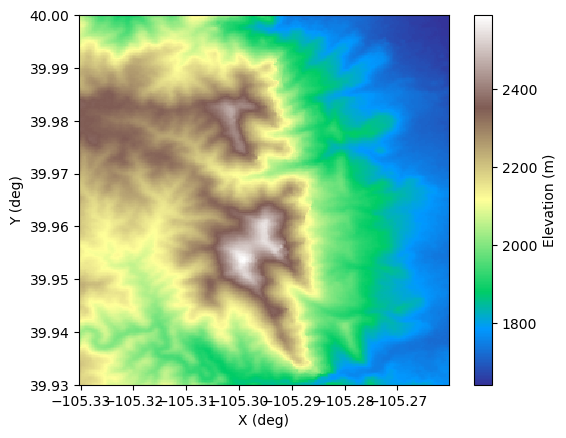

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from bmi_topography import Topography
from landlab import RasterModelGrid, imshow_grid, imshowhs_grid
from landlab.components import BedrockLandslider, PriorityFloodFlowRouter
from landlab.io import read_esri_ascii

topo = Topography(
    dem_type="SRTMGL1",
    south=39.93,
    north=40.0,
    west=-105.33,
    east=-105.26,
    output_format="AAIGrid",
    cache_dir="DEMData//",
)

fname = topo.fetch()
print(fname)
dem = topo.load()
print(dem)

# Read DEM as Landlab grid
grid_geog, elev = read_esri_ascii(fname, name="topographic__elevation")
mg = grid_geog
#grid_geog =mg
mg.imshow(
    "topographic__elevation",
    cmap="terrain",
    grid_units=("deg", "deg"),
    colorbar_label="Elevation (m)",
)

# 2 running the flow accumulator

In [62]:

# # this is the same as writing:
fa = PriorityFloodFlowRouter(
    mg,
    surface="topographic__elevation",
    flow_metric="D8",
    update_flow_depressions=True,
    runoff_rate=None,
    depression_handler="fill",
)

fa.run_one_step()



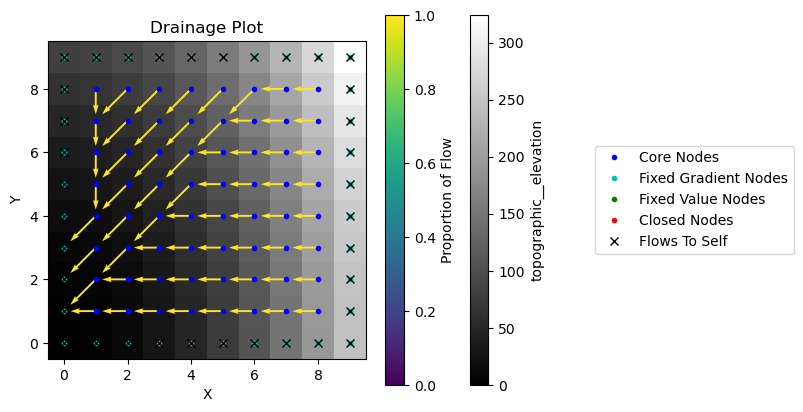

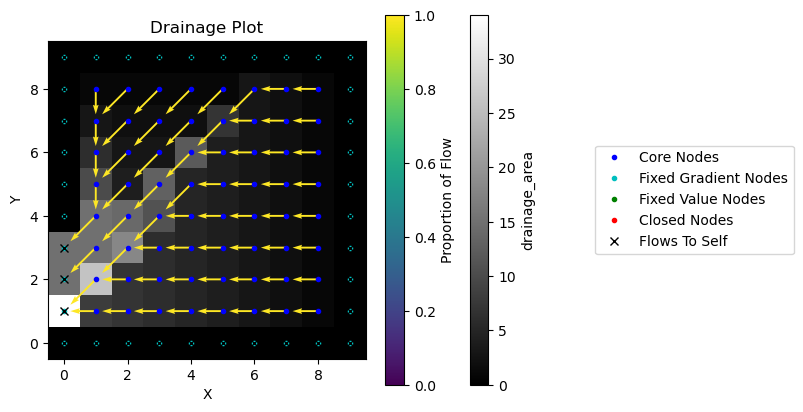

In [63]:
plt.figure()
drainage_plot(mg)

plt.figure()
drainage_plot(mg, "drainage_area")

#print(mg.at_node["drainage_area"].reshape(mg.shape))

# 3 rain

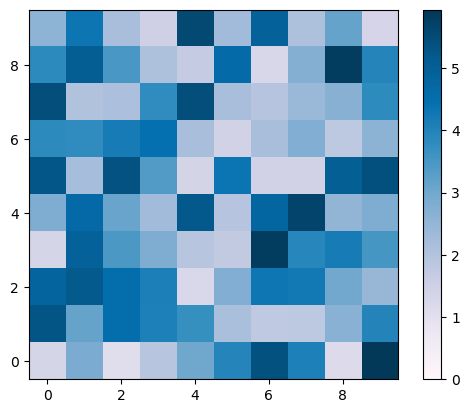

In [64]:
#generating random rain/ precipitation data

rain = 1.0 + 5.0 * np.random.rand(mg.number_of_nodes)

plt.imshow(rain.reshape(mg.shape), origin="lower", cmap="PuBu", vmin=0)
plt.colorbar()
plt.show()

_ = mg.add_field("water__unit_flux_in", rain, at="node", clobber=True)

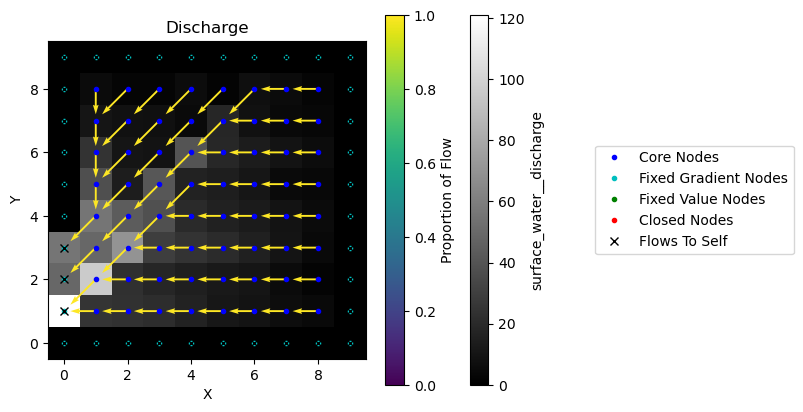

In [22]:
fa.run_one_step()
plt.figure()
drainage_plot(mg, "surface_water__discharge", title="Discharge")

# for one time step


In [48]:

# define the topography 

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

from landlab import RasterModelGrid
from landlab.components import PriorityFloodFlowRouter
from landlab.plot.drainage_plot import drainage_plot


# create a plotting routine to make a 3d plot of our surface.
def surf_plot(mg, surface="topographic__elevation", title="Surface plot of topography"):
    plt.figure()
    ax = plt.axes(projection="3d")

    # Plot the surface.
    Z = mg.at_node[surface].reshape(mg.shape)
    color = cm.gray((Z - Z.min()) / (Z.max() - Z.min()))
    ax.plot_surface(
        mg.x_of_node.reshape(mg.shape),
        mg.y_of_node.reshape(mg.shape),
        Z,
        rstride=1,
        cstride=1,
        facecolors=color,
        linewidth=0.0,
        antialiased=False,
    )
    ax.view_init(elev=35, azim=-120)
    ax.set_xlabel("X axis")
    ax.set_ylabel("Y axis")
    ax.set_zlabel("Elevation")
    plt.title(title)
    plt.show()

mg = RasterModelGrid((10, 10))
_ = mg.add_field(
    "topographic__elevation", 3.0 * mg.x_of_node**2 + mg.y_of_node**2, at="node"
)
#surf_plot(mg, title="Grid 1")

#running it for 1 time step

fa = PriorityFloodFlowRouter(mg)

# # this is the same as writing:
fa = PriorityFloodFlowRouter(
    mg,
    surface="topographic__elevation",
    flow_metric="D8",
    update_flow_depressions=True,
    runoff_rate=None,
    depression_handler="fill",
)



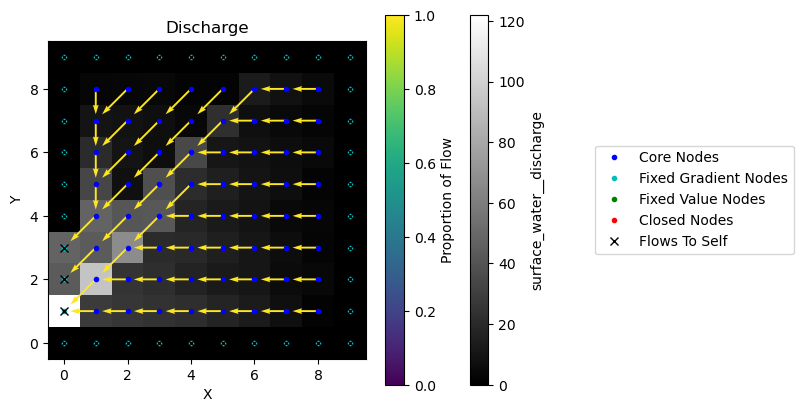

In [49]:
fa = PriorityFloodFlowRouter(mg)
fa.run_one_step()

# adding the rain -- #generating random rain/ precipitation data

rain = 1.0 + 5.0 * np.random.rand(mg.number_of_nodes)
_ = mg.add_field("water__unit_flux_in", rain, at="node", clobber=True)

fa.run_one_step()
plt.figure()
drainage_plot(mg, "surface_water__discharge", title="Discharge")


# for const. filtration capacity

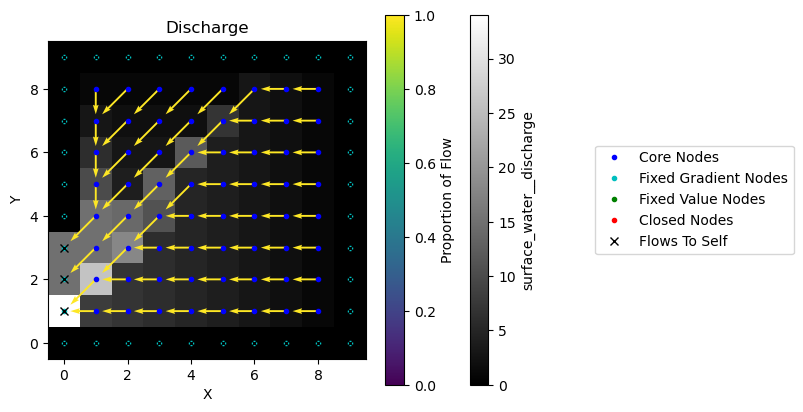

In [45]:
##adding the filtration capacity -constant
# adding the rain -- #generating random rain/ precipitation data
fa.run_one_step()
rain = 1.0 + 5.0 * np.random.rand(mg.number_of_nodes)

#giving infiltration capacity of 30%
final_flux_in = 0.7* rain
_ = mg.add_field("water__unit_flux_in", final_flux_in, at="node", clobber=True)

plt.figure()
drainage_plot(mg, "surface_water__discharge", title="Discharge")

# for variable filtration capacity

In [65]:
rain = 1.0 + 5.0 * np.random.rand(mg.number_of_nodes)
filtration = np.random.rand(mg.number_of_nodes)
final_flux = rain * (1-filtration)

print(filtration)

[0.65780337 0.30593683 0.63348084 0.81776111 0.29640423 0.95666987
 0.13913915 0.77991253 0.11643801 0.63285306 0.43367781 0.90944108
 0.05406961 0.9771473  0.10095335 0.10489748 0.61954777 0.88188979
 0.01250203 0.22219944 0.7310374  0.66652081 0.12086708 0.36495586
 0.24772047 0.87170352 0.02078655 0.43376586 0.83345032 0.54117644
 0.91717372 0.7041178  0.46639233 0.42790484 0.65161725 0.53036344
 0.36721119 0.28033974 0.37766601 0.10269301 0.07297964 0.92226258
 0.70447436 0.02402653 0.15201875 0.83301733 0.35289806 0.19286901
 0.41030515 0.12349612 0.90350567 0.46588302 0.11349985 0.62410883
 0.00864678 0.23567615 0.33493524 0.10970285 0.95519078 0.17957857
 0.98023176 0.06788285 0.49963319 0.96757991 0.2635311  0.32848225
 0.20367171 0.18262007 0.88431681 0.90905938 0.79412557 0.7362036
 0.03053998 0.5119688  0.39365568 0.66334753 0.58380092 0.1527992
 0.62804164 0.18255549 0.66170854 0.40972049 0.34022562 0.97929421
 0.55475173 0.60834801 0.57072467 0.59593593 0.62460419 0.600040

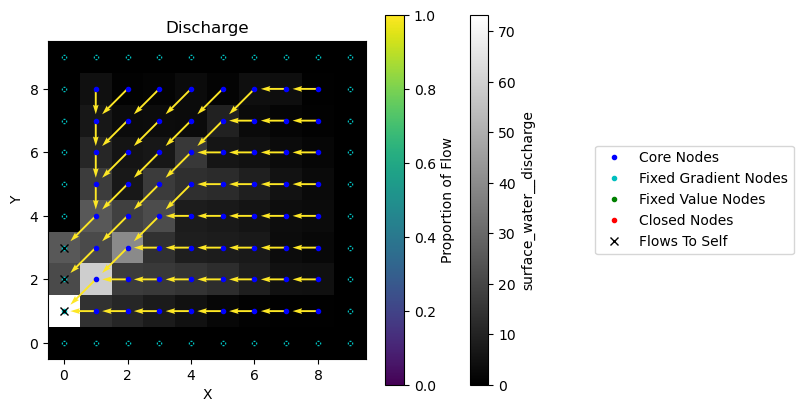

In [53]:

# define the topography 

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

from landlab import RasterModelGrid
from landlab.components import PriorityFloodFlowRouter
from landlab.plot.drainage_plot import drainage_plot


# create a plotting routine to make a 3d plot of our surface.
def surf_plot(mg, surface="topographic__elevation", title="Surface plot of topography"):
    plt.figure()
    ax = plt.axes(projection="3d")

    # Plot the surface.
    Z = mg.at_node[surface].reshape(mg.shape)
    color = cm.gray((Z - Z.min()) / (Z.max() - Z.min()))
    ax.plot_surface(
        mg.x_of_node.reshape(mg.shape),
        mg.y_of_node.reshape(mg.shape),
        Z,
        rstride=1,
        cstride=1,
        facecolors=color,
        linewidth=0.0,
        antialiased=False,
    )
    ax.view_init(elev=35, azim=-120)
    ax.set_xlabel("X axis")
    ax.set_ylabel("Y axis")
    ax.set_zlabel("Elevation")
    plt.title(title)
    plt.show()

mg = RasterModelGrid((10, 10))
_ = mg.add_field(
    "topographic__elevation", 3.0 * mg.x_of_node**2 + mg.y_of_node**2, at="node"
)
#surf_plot(mg, title="Grid 1")

#running it for 1 time step

fa = PriorityFloodFlowRouter(mg)

# # this is the same as writing:
fa = PriorityFloodFlowRouter(
    mg,
    surface="topographic__elevation",
    flow_metric="D8",
    update_flow_depressions=True,
    runoff_rate=None,
    depression_handler="fill",
)


#adding variable filtration capacity

fa = PriorityFloodFlowRouter(mg)
fa.run_one_step()

# adding the rain -- #generating random rain/ precipitation data

rain = 1.0 + 5.0 * np.random.rand(mg.number_of_nodes)
filtration = np.random.rand(mg.number_of_nodes)
final_flux = rain * (1-filtration)

_ = mg.add_field("water__unit_flux_in", final_flux, at="node", clobber=True)

fa.run_one_step()
plt.figure()
drainage_plot(mg, "surface_water__discharge", title="Discharge")

# on real world problem

/opt/tljh/user/envs/ivy/lib/python3.13/site-packages/bmi_topography/api_key.py:48: UserWarning: You are using a demo key to fetch data from OpenTopography, functionality will be limited. See https://bmi-topography.csdms.io/en/latest/#api-key for more information.
  warnings.warn(
/opt/tljh/user/envs/ivy/lib/python3.13/site-packages/bmi_topography/topography.py:216: UserWarning: A CRS cannot be identified for these data. Grid units will be set to 'unknown'.
  warnings.warn(
/tmp/ipykernel_657619/2457523498.py:24: DeprecationWarning: landlab.io.read_asc_header has been deprecated, use landlab.io.esri_ascii.parse instead
  grid_geog, elev = read_esri_ascii(fname, name="topographic__elevation")


/home/jupyter-ektaagg05@gmail.co-20b0a/repos/ESPIn_Floods_2025/notebooks/ektaagg/DEMData/SRTMGL1_39.93_-105.33_40.0_-105.26.asc
<xarray.DataArray 'SRTMGL1' (band: 1, y: 252, x: 252)> Size: 254kB
[63504 values with dtype=int32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 2kB -105.3 -105.3 -105.3 ... -105.3 -105.3 -105.3
  * y            (y) float64 2kB 40.0 40.0 40.0 40.0 ... 39.93 39.93 39.93 39.93
    spatial_ref  int64 8B 0
Attributes:
    _FillValue:    -32768
    scale_factor:  1.0
    add_offset:    0.0
    units:         unknown


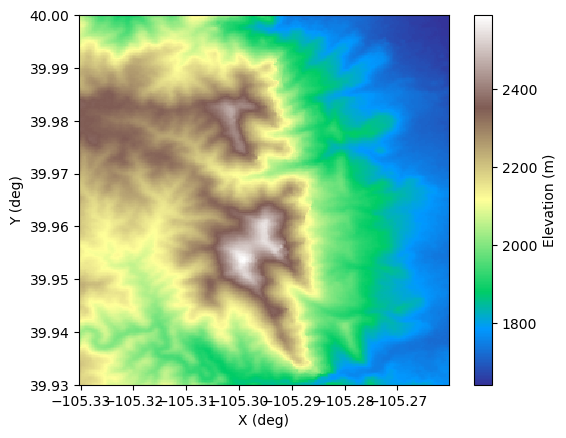

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from bmi_topography import Topography
from landlab import RasterModelGrid, imshow_grid, imshowhs_grid
from landlab.components import BedrockLandslider, PriorityFloodFlowRouter
from landlab.io import read_esri_ascii

topo = Topography(
    dem_type="SRTMGL1",
    south=39.93,
    north=40.0,
    west=-105.33,
    east=-105.26,
    output_format="AAIGrid",
    cache_dir="DEMData//",
)

fname = topo.fetch()
print(fname)
dem = topo.load()
print(dem)

# Read DEM as Landlab grid
grid_geog, elev = read_esri_ascii(fname, name="topographic__elevation")
mg = grid_geog
#grid_geog =mg
mg.imshow(
    "topographic__elevation",
    cmap="terrain",
    grid_units=("deg", "deg"),
    colorbar_label="Elevation (m)",
)

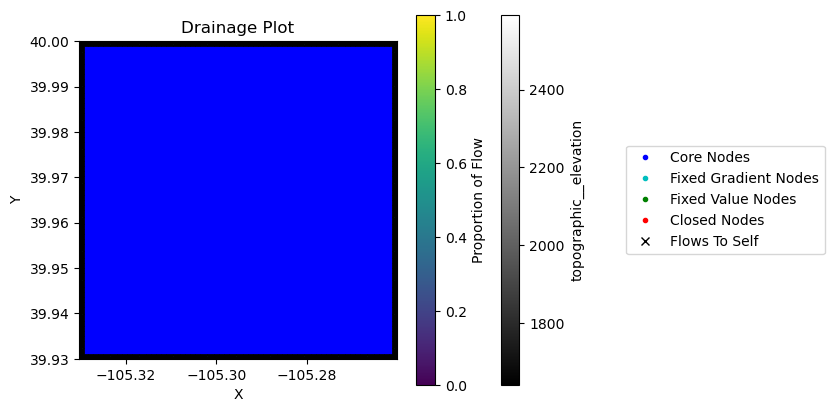

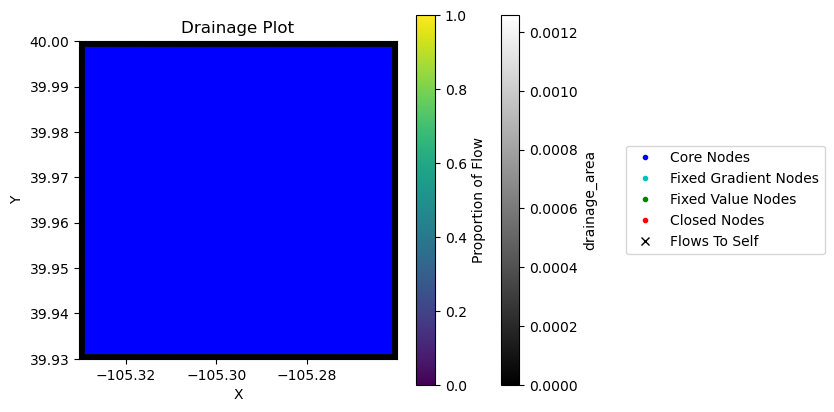

In [70]:

# # this is the same as writing:
fa = PriorityFloodFlowRouter(
    mg,
    surface="topographic__elevation",
    flow_metric="D8",
    update_flow_depressions=True,
    runoff_rate=None,
    depression_handler="fill",
)

fa.run_one_step()

plt.figure()
drainage_plot(mg)

plt.figure()
drainage_plot(mg, "drainage_area")

#print(mg.at_node["drainage_area"].reshape(mg.shape))

# soilfiltration component

# on synthetic surface


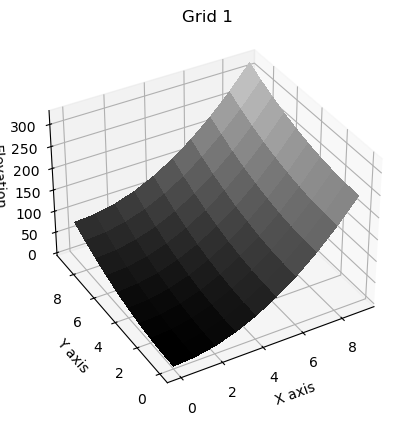

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

from landlab import RasterModelGrid
from landlab.components import PriorityFloodFlowRouter
from landlab.plot.drainage_plot import drainage_plot


# create a plotting routine to make a 3d plot of our surface.
def surf_plot(mg, surface="topographic__elevation", title="Surface plot of topography"):
    plt.figure()
    ax = plt.axes(projection="3d")

    # Plot the surface.
    Z = mg.at_node[surface].reshape(mg.shape)
    color = cm.gray((Z - Z.min()) / (Z.max() - Z.min()))
    ax.plot_surface(
        mg.x_of_node.reshape(mg.shape),
        mg.y_of_node.reshape(mg.shape),
        Z,
        rstride=1,
        cstride=1,
        facecolors=color,
        linewidth=0.0,
        antialiased=False,
    )
    ax.view_init(elev=35, azim=-120)
    ax.set_xlabel("X axis")
    ax.set_ylabel("Y axis")
    ax.set_zlabel("Elevation")
    plt.title(title)
    plt.show()

mg = RasterModelGrid((10, 10))
_ = mg.add_field(
    "topographic__elevation", 3.0 * mg.x_of_node**2 + mg.y_of_node**2, at="node"
)
surf_plot(mg, title="Grid 1")

In [54]:
print(SoilInfiltrationGreenAmpt.__init__.__doc__)


Parameters
----------
grid : RasterModelGrid
    A grid.
hydraulic_conductivity : float, array, or field name (m/s)
    The soil effective hydraulic conductivity.
soil_bulk_density : float (kg/m**3)
    The dry bulk density of the soil.
rock_density : float (kg/m**3)
    The density of the soil constituent material (i.e., lacking porosity).
initial_soil_moisture_content : float (m**3/m**3, 0. to 1.)
    The fraction of the initial pore space filled with water.
soil_type : str
    A soil type to automatically set soil_pore_size_distribution_index
    and soil_bubbling_pressure, using mean values from Rawls et al.,
    1992. The following options are supported: 'sand', loamy sand',
    'sandy loam', 'loam', 'silt loam', 'sandy clay loam', 'clay loam',
    'silty clay loam', 'sandy clay', 'silty clay', or 'clay'.
volume_fraction_coarse_fragments : float (m**3/m**3, 0. to 1.)
    The fraction of the soil made up of rocky fragments with very
    little porosity, with diameter > 2 mm.
coars

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01]
[0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 

  0%|          | 0/30 [00:00<?, ?it/s]

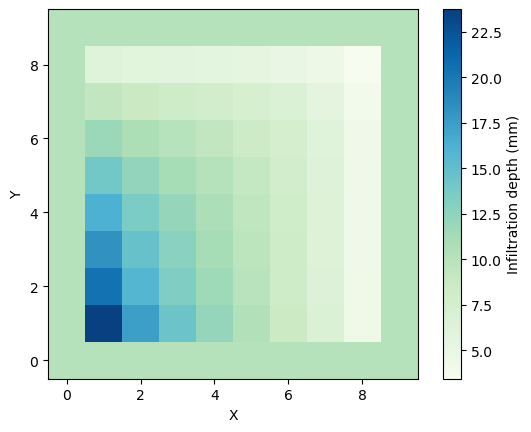

In [53]:
# Create and initialize required input fields for infiltration
# component: depth of surface water, and depth (water volume per
# area) of infiltrated water.
depth = mg.add_zeros("surface_water__depth", at="node")
print(depth)
depth[:] = 1.0e-2 
print(depth)
infilt = mg.add_zeros("soil_water_infiltration__depth", at="node")
infilt[:] = 1.0e-4  # small amount infiltrated (0.1 mm)
print(infilt)

# Instantiate an infiltration component
ga = SoilInfiltrationGreenAmpt(mg)

# Instantiate an overland flow component
kw = KinwaveImplicitOverlandFlow(
    mg, runoff_rate=90.0, roughness=0.1, depth_exp=5.0 / 3.0
)

# Set time step and storm duration
dt = 10.0  # time step, sec
storm_duration = 300.0  # storm duration, sec

nsteps = int(storm_duration / dt)


for i in trange(nsteps):# Run it for 10 minutes of heavy rain
    kw.run_one_step(dt)
    ga.run_one_step(dt)

mg.imshow(1000.0 * infilt, colorbar_label="Infiltration depth (mm)", cmap="GnBu")

In [59]:
SoilInfiltrationGreenAmpt.input_var_names



('soil_water_infiltration__depth', 'surface_water__depth')

In [60]:
SoilInfiltrationGreenAmpt.output_var_names

('soil_water_infiltration__depth', 'surface_water__depth')

In [2]:
import copy

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from landlab.components import PriorityFloodFlowRouter
from landlab.components import ErosionDeposition, FlowAccumulator
from landlab.plot import imshow_grid
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

from landlab import HexModelGrid, RasterModelGrid
from landlab.components import (
    DepressionFinderAndRouter,
    FlowAccumulator,
    FlowDirectorD8,
    FlowDirectorSteepest,
)
from landlab.plot.drainage_plot import drainage_plot


dx = 100.0
K = 0.0001  # erodibility coefficient, 1/yr
m_sp = 0.5  # exponent on drainage area or discharge, -
n_sp = 1.0  # exponent on slope, -
sp_crit = 0.0  # erosion threshold
v_s = 100.0  # settling velocity parameter (dimensionless if drainage area is used instead of discharge)
F_f = 0.5  # fraction of fines generated during bed erosion
initial_elevation = (
    200.0  # starting elevation of an "uplifted block" (rapid baselevel drop), m
)

run_duration = 1200.0  # duration of run, yr
dt = 10.0  # time-step duration, yr
plot_every = 200.0  # time interval for plotting, yr

# Derived parameters
nsteps = int(run_duration / dt)
next_plot = plot_every

# set up colormap
cmap = copy.copy(mpl.colormaps["pink"])

#fa = PriorityFlodFlowRouter(rmg)

# this is the same as writing:
fa = PriorityFloodFlowRouter(
    rmg,
    surface="topographic__elevation",
    flow_metric="D8",
    update_flow_depressions=True,
    runoff_rate=None,
    depression_handler="breach",
)
fa.run_one_step()

#plt.figure()
#drainage_plot(rmg)

#fr = FlowAccumulator(rmg, depression_finder="DepressionFinderAndRouter")
ed = ErosionDeposition(
    rmg,
    K=K,
    m_sp=m_sp,
    n_sp=n_sp,
    sp_crit=sp_crit,
    v_s=v_s,
    F_f=F_f,
    solver="adaptive",  # use the adaptive time stepper, which is slightly faster
)
for i in range(1, nsteps + 1):
    # route flow
    fa.run_one_step()  # run_one_step isn't time sensitive, so it doesn't take dt as input

    # do some erosion/deposition
    ed.run_one_step(dt)

    if i * dt >= next_plot:
        plt.figure()
        imshow_grid(
            rmg,
            "topographic__elevation",
            grid_units=["m", "m"],
            var_name="Elevation (m)",
            cmap=cmap,
        )
        next_plot += plot_every

NameError: name 'rmg' is not defined

In [3]:
## 12th may 


In [20]:
>>> import numpy as np
>>> from landlab import RasterModelGrid
>>> from landlab.components import FlowAccumulator, FastscapeEroder

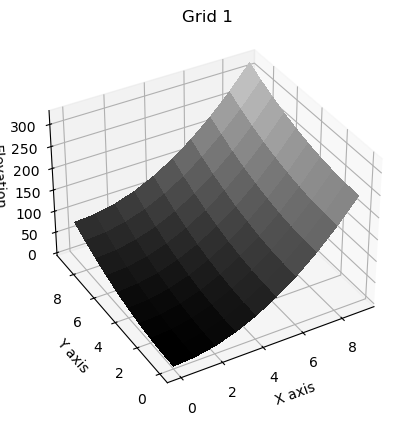

In [21]:
def surf_plot(mg, surface="topographic__elevation", title="Surface plot of topography"):
    plt.figure()
    ax = plt.axes(projection="3d")

    # Plot the surface.
    Z = mg.at_node[surface].reshape(mg.shape)
    color = cm.gray((Z - Z.min()) / (Z.max() - Z.min()))
    ax.plot_surface(
        mg.x_of_node.reshape(mg.shape),
        mg.y_of_node.reshape(mg.shape),
        Z,
        rstride=1,
        cstride=1,
        facecolors=color,
        linewidth=0.0,
        antialiased=False,
    )
    ax.view_init(elev=35, azim=-120)
    ax.set_xlabel("X axis")
    ax.set_ylabel("Y axis")
    ax.set_zlabel("Elevation")
    plt.title(title)
    plt.show()

mg = RasterModelGrid((10, 10))
_ = mg.add_field(
    "topographic__elevation", 3.0 * mg.x_of_node**2 + mg.y_of_node**2, at="node"
)
surf_plot(mg, title="Grid 1")

In [25]:
#setting the grid as the mg topography and setting the noundary conditions to the topo
>>> grid = mg

>>> grid.status_at_node[grid.nodes_at_left_edge] = grid.BC_NODE_IS_FIXED_VALUE
>>> grid.status_at_node[grid.nodes_at_top_edge] = grid.BC_NODE_IS_CLOSED
>>> grid.status_at_node[grid.nodes_at_bottom_edge] = grid.BC_NODE_IS_CLOSED
>>> grid.status_at_node[grid.nodes_at_right_edge] = grid.BC_NODE_IS_CLOSED
>>> cell_area = 1.0
#>>> fr = FlowAccumulator(grid, flow_director="D8", runoff_rate=2.0)
>>> fr = FlowAccumulator(grid, flow_director="D8")
#adding the rain and filtration component 
rain = 1.0 + 5.0 * np.random.rand(mg.number_of_nodes)
filtration = np.random.rand(mg.number_of_nodes)
final_flux = rain * (1-filtration)

#_ = mg.add_field("water__unit_flux_in", final_flux, at="node", clobber=True)

#adding that final flux as the water unit flux input.
#>>> grid.at_node["water__unit_flux_in"]
grid.add_field("water__unit_flux_in", final_flux, at="node", clobber=True)

#adding components
>>> K_field = grid.ones(at="node")  # K can be a field
>>> sp = FastscapeEroder(
...     grid,
...     K_sp=K_field,
...     m_sp=1.0,
...     n_sp=0.6,
...     threshold_sp=grid.node_x,
...     discharge_field="surface_water__discharge", #commputed by surface_water__discharge = water__unit_flux_in × drainage_area
... )
>>> fr.run_one_step()
>>> sp.run_one_step(1.0)
>>> z.reshape(grid.shape)[1, :]

plt.figure()
drainage_plot(mg, "surface_water__discharge", title="Discharge")


array([  1.        ,   3.33855637,  10.97862725,  24.65097295,
        44.55036146,  70.75839358, 103.3542347 , 142.46841901,
       188.40621991, 244.        ])

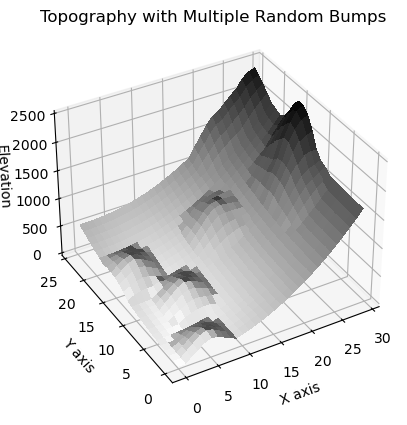

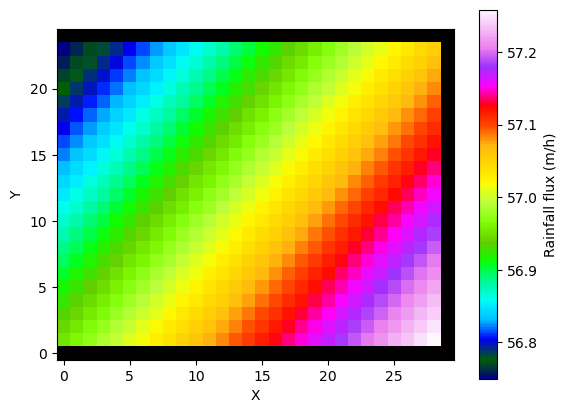

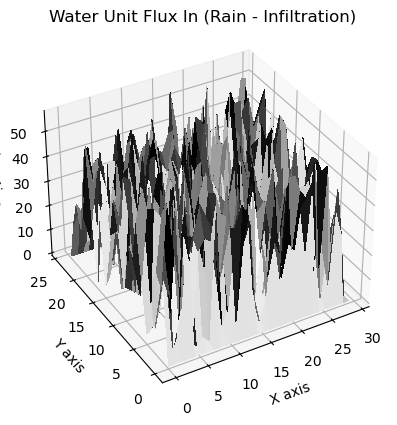

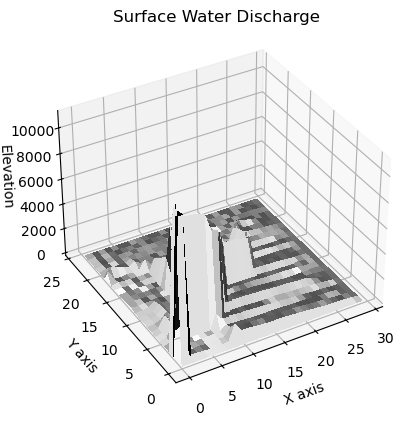

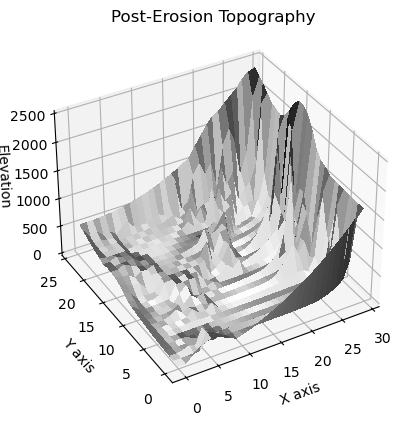

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from landlab import RasterModelGrid
from landlab.components import FlowAccumulator, FastscapeEroder
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import os

from landlab import RasterModelGrid
from landlab.components import PriorityFloodFlowRouter, SpatialPrecipitationDistribution
from landlab.plot.drainage_plot import drainage_plot
from landlab.components import OverlandFlow, SpatialPrecipitationDistribution
from landlab.io import esri_ascii
from landlab.components import PriorityFloodFlowRouter

# ---- Helper function to plot surfaces ----
def surf_plot(mg, surface="topographic__elevation", title="Surface plot"):
    plt.figure()
    ax = plt.axes(projection="3d")
    Z = mg.at_node[surface].reshape(mg.shape)
    color = cm.gray_r((Z - Z.min()) / (Z.max() - Z.min()))
    ax.plot_surface(
        mg.x_of_node.reshape(mg.shape),
        mg.y_of_node.reshape(mg.shape),
        Z,
        rstride=1,
        cstride=1,
        facecolors=color,
        linewidth=0,
        antialiased=False,
    )
    ax.view_init(elev=35, azim=-120)
    ax.set_xlabel("X axis")
    ax.set_ylabel("Y axis")
    ax.set_zlabel("Elevation")
    plt.title(title)
    plt.show()

# ---- 1. Create grid and initial elevation ----
# Create grid
mg = RasterModelGrid((25, 30))
x, y = mg.x_of_node, mg.y_of_node
base_elevation =1.0 + x**2.2 + y**2
mg.add_field("topographic__elevation", base_elevation, at="node")

# Parameters
num_bumps = 10
bump_height = 300
bump_radius = 4  # in grid units
sigma = bump_radius / 2.0

# Randomly choose 10 distinct nodes
#np.random.seed(42)  # For reproducibility (optional)
raised_nodes = np.random.choice(mg.number_of_nodes, size=num_bumps, replace=False)
#raised_nodes = np.array([197, 124, 494, 443,  60, 233, 627, 296, 600, 274])

# Add a Gaussian bump around each raised node
for node in raised_nodes:
    xc, yc = x[node], y[node]
    distances = np.sqrt((x - xc)**2 + (y - yc)**2)
    mask = distances < bump_radius
    bump = bump_height * np.exp(-((distances[mask])**2) / (2 * sigma**2))
    mg.at_node["topographic__elevation"][mask] += bump

# Plot the final terrain
surf_plot(mg, title="Topography with Multiple Random Bumps")

# ---- 2. Set boundary conditions ----
mg.status_at_node[mg.nodes_at_left_edge] = mg.BC_NODE_IS_FIXED_VALUE
mg.status_at_node[mg.nodes_at_top_edge] = mg.BC_NODE_IS_CLOSED
mg.status_at_node[mg.nodes_at_bottom_edge] = mg.BC_NODE_IS_CLOSED
mg.status_at_node[mg.nodes_at_right_edge] = mg.BC_NODE_IS_CLOSED

# ---- 3. Apply spatially variable rainfall and infiltration ----


rain = SpatialPrecipitationDistribution(mg)
np.random.seed(26)  # arbitrary to get a cool-looking storm out every time

# get the storm simulator to provide a storm
# There's only one storm generated here in the time series, so easy enough to do.
# first, check the directory we need for saving exists, and make it if not:
if not os.path.exists("./rainfall"):
    os.makedirs("./rainfall")

# storm lengths in hrs
for storm_t, interstorm_t in rain.yield_storms(style="monsoonal"):
    mg.at_node["rainfall__flux"] *= 0.2#0.001  # because the rainfall comes out in mm/h
    # to make the storm heavier and more interesting!
    mg.at_node["rainfall__flux"] *= 20#10.0
    plt.figure()
    # plot up this storm
    mg.imshow("rainfall__flux", cmap="gist_ncar", colorbar_label="Rainfall flux (m/h)")
    plt.show()
    with open("./rainfall/rainfall.asc", "w") as fp:
        esri_ascii.dump(mg, fp, name="rainfall__flux", at="node")
 
filtration=np.random.rand(mg.number_of_nodes)
final_flux = mg.at_node["rainfall__flux"] * (1 - filtration)


#rain = 1.0 + 5.0 * np.random.rand(mg.number_of_nodes)       # Rain: 1 to 6
#filtration = np.random.rand(mg.number_of_nodes)             # Infiltration: 0 to 1
#final_flux = rain * (1 - filtration)                        # Effective runoff
mg.add_field("water__unit_flux_in", final_flux, at="node", clobber=True)

surf_plot(mg, surface="water__unit_flux_in", title="Water Unit Flux In (Rain - Infiltration)")

# ---- 4. Flow routing ----
fr = FlowAccumulator(mg, flow_director="D8")
fr.run_one_step()

# ---- 5. Plot discharge field ----
surf_plot(mg, surface="surface_water__discharge", title="Surface Water Discharge")

# ---- 6. Erosion (Fastscape) ----
K_field = mg.ones(at="node")
sp = FastscapeEroder(
    mg,
    K_sp=K_field,
    m_sp=1.0,
    n_sp=0.6,
    threshold_sp=mg.node_x,
    discharge_field="surface_water__discharge",
)
sp.run_one_step(1.0)

surf_plot(mg, surface="topographic__elevation", title="Post-Erosion Topography")

